# Forecast examples
This notebook demonstrates how to read and upload forecasts

In [1]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../..'))

In [2]:
import pandas as pd
import numpy as np
from hps_api_client.apiproxy import ApiProxy

## Create a API client and query forecasts

In [3]:
client = ApiProxy(uri = "http://leviathan:5400/api/v1/")

Forecasts are tied to a hydro system and we will start by listing those available and choosing Flørli as the system we will be working on

In [4]:
hydro_systems = client.get_hydro_systems()
selected_hydro_system = hydro_systems[0]
selected_hydro_system

,description,name,uid
0,Representasjonen av hydrosystemet small,small,e98aff01-526b-44d0-a950-bc17aa2382ad


We can now list all forecasts available for our hydro system.

In [5]:
forecasts = client.get_forecasts(selected_hydro_system)
forecasts

,name,uid
0,My example forecast,e40d775e-0e10-4593-a4c5-7cb5b1f08f94


Lets pick one and list available scenarios.

In [6]:
selected_forecast = forecasts[0]
scenarios = client.get_forecast_scenarios(selected_forecast)
print(scenarios)

['2017', '2014', '2019', '2013', '2018', '2020', '2016', '2015']


We can retrieve data for a single scenario...

In [7]:
client.get_scenario_data(selected_forecast, "2014")

,Inflow,Price
Date,,
2021-01-01 00:00:00+00:00,2.544670,24.353
2021-01-01 01:00:00+00:00,2.539753,24.136
2021-01-01 02:00:00+00:00,2.535386,23.809
2021-01-01 03:00:00+00:00,2.530477,23.147
2021-01-01 04:00:00+00:00,2.522850,21.765
...,...,...
2023-01-01 19:00:00+00:00,1.855739,15.204
2023-01-01 20:00:00+00:00,1.855739,15.204
2023-01-01 21:00:00+00:00,1.855739,15.204


.. or read all scenarions in one go.

In [8]:
data = client.get_forecast_data(selected_forecast)
data

100%|██████████| 8/8 [00:05<00:00,  1.33it/s]


,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow
,2017,2017,2014,2014,2019,2019,2013,2013,2018,2018,2020,2020,2016,2016,2015,2015
Date,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,25.774,12.125332,24.353,2.544670,48.519,2.440129,24.216,1.384993,25.801,1.147806,31.386,10.774597,15.726,1.852434,24.797,0.732679
2021-01-01 01:00:00+00:00,25.566,11.938085,24.136,2.539753,48.996,2.692150,24.209,1.407347,25.899,1.138747,31.336,10.535203,15.390,1.856212,24.498,0.738214
2021-01-01 02:00:00+00:00,25.439,11.745013,23.809,2.535386,48.917,2.928800,23.930,1.428614,25.575,1.132725,31.139,10.298784,15.103,1.864723,24.372,0.742225
2021-01-01 03:00:00+00:00,25.411,11.537142,23.147,2.530477,48.121,3.159487,23.152,1.454670,24.204,1.129720,30.853,10.061450,14.939,1.862828,24.281,0.741297
2021-01-01 04:00:00+00:00,25.430,11.335416,21.765,2.522850,46.947,3.350918,22.425,1.481359,24.243,1.128969,30.301,9.834264,14.843,1.857631,24.263,0.744082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00+00:00,47.977,2.179070,15.204,1.855739,22.082,0.785746,25.236,0.724407,32.106,11.032112,25.476,2.579765,26.301,1.183608,26.040,12.925282
2023-01-01 20:00:00+00:00,47.977,2.179070,15.204,1.855739,22.082,0.785746,25.236,0.724407,32.106,11.032112,24.257,2.570421,25.732,1.167546,25.767,12.783272


Note that the dataframe above has a MultiIndex and is accessed by both scenario and series type.

<AxesSubplot:xlabel='Date'>

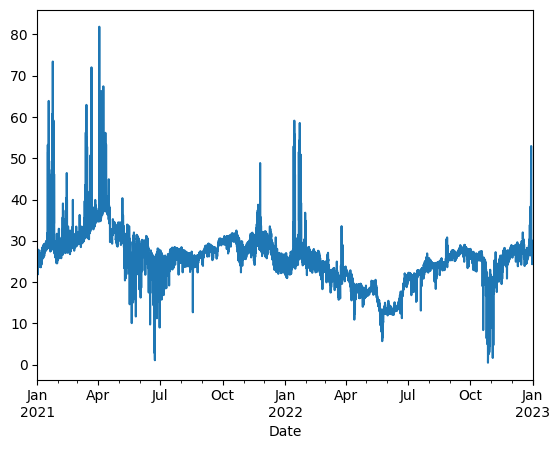

In [9]:
data[("Price", "2013")].plot()

Alternativly we can access all prices or inflows by using the primary index.

<AxesSubplot:xlabel='Date'>

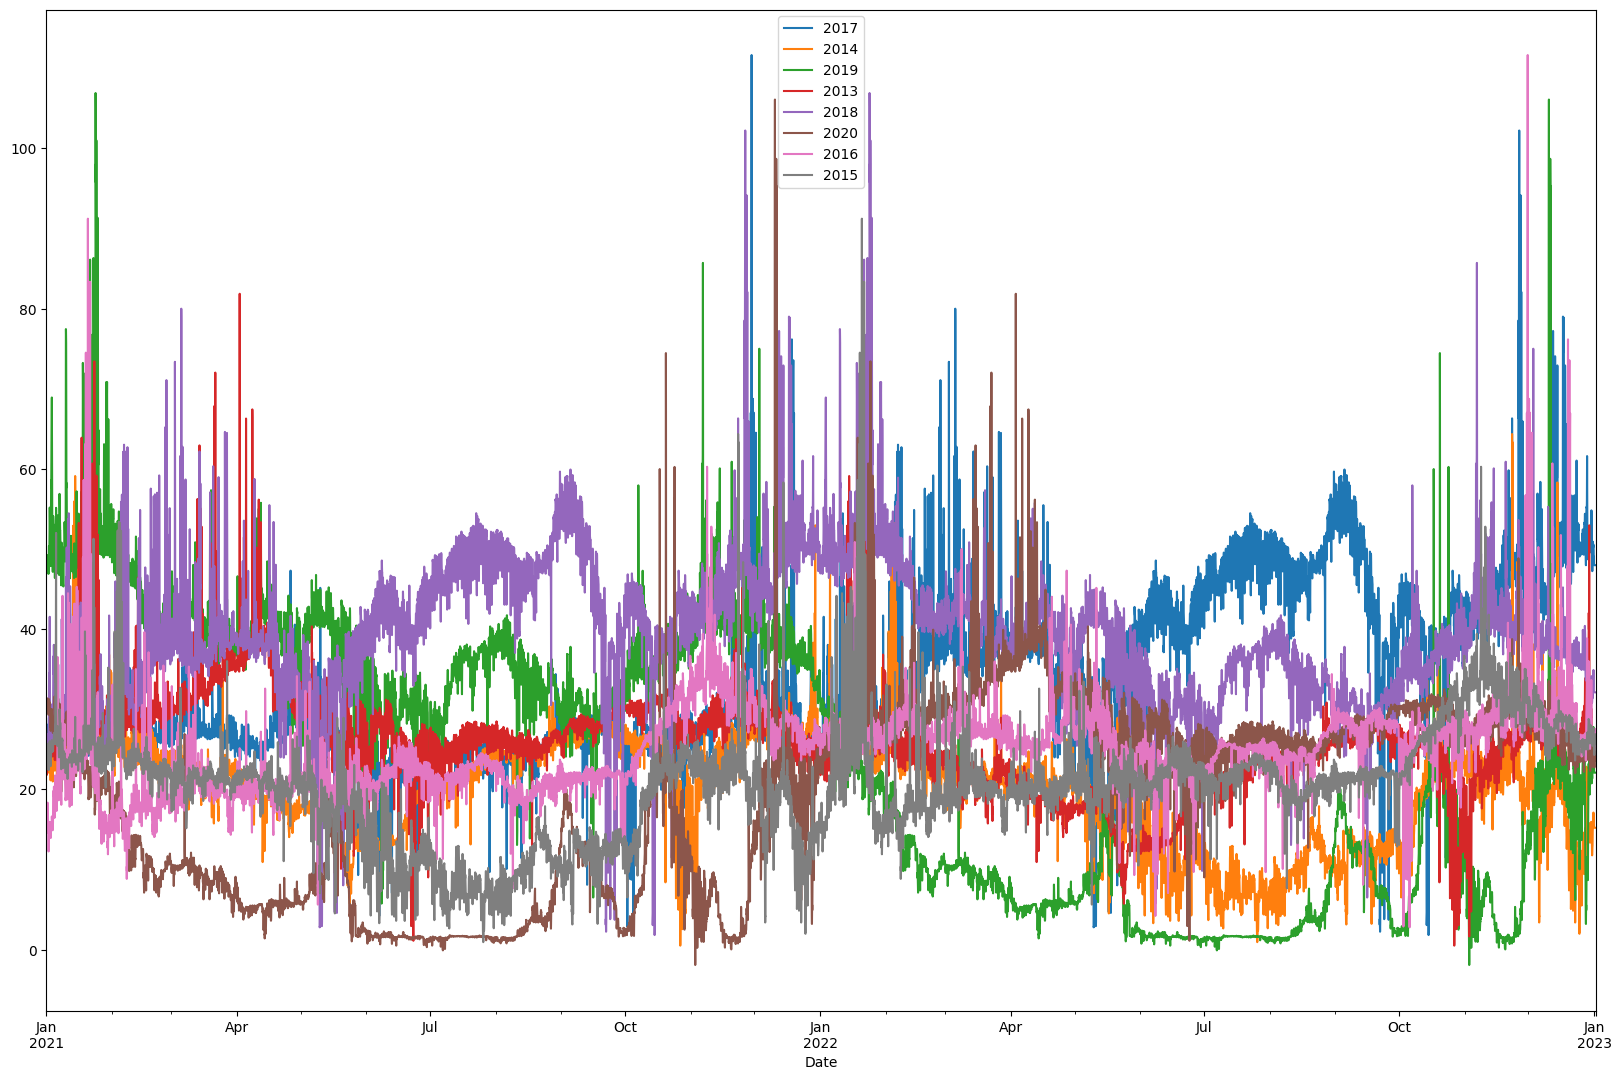

In [10]:
data["Price"].plot(figsize=(20,13))

We now want to add a new forecast to our chosen hydro system. The add_forecast method accepts a pandas DataFrame of the same format that we retrieved above. Lets build it..

In [11]:
data = {}
dates = pd.date_range("2020-12-31 23:00:00+00:00", "2025-12-31 23:00:00+00:00",freq='1d')

for year in range(2000, 2030):
    scenario = str(year)
    prices = np.random.random(len(dates)) * 60
    inflows = np.random.random(len(dates)) * 20
    
    data[("Price", scenario)] = prices
    data[("Inflow", scenario)] = inflows
    
df = pd.DataFrame(data)
df["Date"] = dates
df.set_index("Date", inplace=True)

display(df.head())
display(df.tail())

,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow,...,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow
,2000,2000,2001,2001,2002,2002,2003,2003,2004,2004,...,2025,2025,2026,2026,2027,2027,2028,2028,2029,2029
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 23:00:00+00:00,37.887687,12.805617,9.353974,14.599854,28.779492,8.178188,19.764324,2.111700,34.462041,18.498576,...,28.094797,14.224429,3.743730,9.522356,0.623218,1.999957,26.692811,5.309089,52.036052,19.364025
2021-01-01 23:00:00+00:00,48.383910,11.711905,21.352269,0.338250,50.542135,18.933629,22.900361,4.453587,23.863872,5.570808,...,48.098440,9.746880,26.080443,9.724334,41.080732,2.103833,17.327471,14.602728,36.299162,17.153144
2021-01-02 23:00:00+00:00,52.723242,1.254929,5.540182,15.086413,21.056468,2.790330,11.822933,15.226472,43.880378,18.856264,...,10.484417,13.576896,56.601128,3.026000,35.634282,12.101288,44.030076,5.302153,12.423703,17.309433
2021-01-03 23:00:00+00:00,52.681163,10.239459,7.452100,4.976324,39.412814,15.158240,13.967941,18.024758,19.070388,15.045405,...,56.219202,3.522078,55.363068,18.844657,37.147618,1.687361,12.284857,8.673766,18.756167,3.281916
2021-01-04 23:00:00+00:00,48.580455,16.703981,13.528101,19.271547,22.905804,13.976805,47.047220,18.164010,17.918027,4.691280,...,48.205264,18.692011,25.859619,19.435858,37.573841,6.842380,49.228410,0.608629,4.091080,11.206420


,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow,...,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow
,2000,2000,2001,2001,2002,2002,2003,2003,2004,2004,...,2025,2025,2026,2026,2027,2027,2028,2028,2029,2029
Date,,,,,,,,,,,,,,,,,,,,,
2025-12-27 23:00:00+00:00,19.933980,1.272415,3.857516,0.019059,22.833218,3.450039,26.287570,4.411056,36.796289,6.209988,...,40.435287,2.840402,15.414602,13.171073,0.979451,3.700043,25.325814,6.952560,42.460202,0.789968
2025-12-28 23:00:00+00:00,22.586831,18.193332,41.938525,9.074685,42.447121,18.086641,6.312517,9.043493,32.873707,17.066087,...,39.489754,10.947884,39.203827,19.522425,33.863162,9.793266,11.186610,16.677677,9.592046,14.072044
2025-12-29 23:00:00+00:00,17.497685,6.328529,52.787110,6.015126,12.447082,19.709566,16.647792,18.230626,13.202089,2.572134,...,12.921268,15.634186,36.885325,19.615348,30.564674,8.814899,33.249371,15.936693,59.660064,3.532855
2025-12-30 23:00:00+00:00,33.248072,5.276201,23.860112,9.005741,57.613182,19.521442,32.812147,0.595273,40.241130,4.797270,...,41.887465,16.395902,59.804624,9.637248,34.682349,19.454504,5.352086,16.161615,22.453981,16.096451
2025-12-31 23:00:00+00:00,13.772270,1.661652,56.309296,4.822004,48.999979,0.303316,30.420361,12.769194,38.147835,15.598083,...,29.974802,15.800310,19.141391,5.804266,40.459626,11.560475,49.537976,2.783382,44.446549,0.442627


<AxesSubplot:xlabel='Date'>

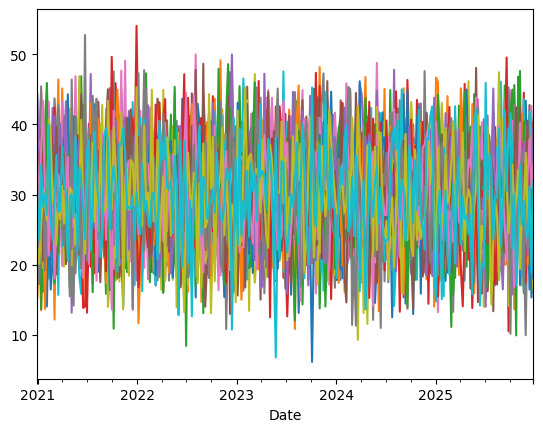

In [12]:
df["Price"].resample('7D').mean().plot(legend=None)

## Upload a forecast
When uploading we have to specify a name for the new forecast and the hydro system that we want to associate it with.

In [13]:
client.add_forecast("Demo forecast", selected_hydro_system, df.iloc[:1000])

100%|████████████████████████████| 30/30 [09:23<00:00, 18.80s/it]

Forecast 'Demo forecast' with 30 scenarios succeessfully uploaded to server


Finally, lets verify that the forecast is in place and ready for training and evaluation.

In [15]:
new_forecast = client.get_forecasts(selected_hydro_system)[-1]
df_demo = client.get_forecast_data(new_forecast)
df_demo.head()

100%|████████████████████████████| 30/30 [00:02<00:00, 12.48it/s]


,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow,...,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow,Price,Inflow
,2004,2004,2007,2007,2013,2013,2000,2000,2015,2015,...,2009,2009,2014,2014,2011,2011,2017,2017,2006,2006
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 23:00:00+00:00,54.909663,9.179774,46.823054,17.172958,43.030637,19.304367,59.991667,6.916604,8.892035,16.658409,...,31.776592,18.162667,14.417436,16.810933,12.093126,16.024748,39.101639,15.431358,7.059892,7.797138
2021-01-01 23:00:00+00:00,27.954232,6.013145,14.281136,6.961088,30.390223,1.361395,43.174401,19.010076,33.690228,14.829469,...,12.987302,0.736683,59.805543,2.511379,6.592895,17.827748,34.016895,8.288816,12.858995,12.171886
2021-01-02 23:00:00+00:00,46.329084,16.025673,11.636972,0.758417,46.411663,15.744750,9.222366,1.441623,24.443324,14.736090,...,14.137940,17.447325,42.142372,10.373209,23.868272,17.402220,3.730136,4.901730,12.773018,3.215364
2021-01-03 23:00:00+00:00,2.353441,13.551066,17.103925,17.662903,39.758547,6.797495,12.755396,17.574900,21.858450,3.754766,...,50.399973,6.675734,57.065855,17.880009,47.360444,18.581034,17.338502,18.233672,36.782328,9.674282
2021-01-04 23:00:00+00:00,9.623350,18.427096,10.016079,3.323531,2.142501,1.645199,53.995414,0.821304,28.985266,3.709660,...,15.088942,13.547184,2.072240,0.284274,36.633208,13.759216,34.271456,16.338341,41.774948,13.015845
